In [9]:
import zipfile

with zipfile.ZipFile('googleplaystore.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()



In [10]:
import os
os.listdir()




['.config',
 'googleplaystore.csv',
 '.ipynb_checkpoints',
 'googleplaystore.csv.zip',
 'sample_data']

In [11]:
import pandas as pd

df = pd.read_csv('googleplaystore.csv')
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
df.shape


(10841, 13)

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [15]:

df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [16]:
df['Price'].isnull().sum()
df['Price'].dtype


dtype('float64')

In [17]:
df['Reviews'] = df['Reviews'].astype(str)
df['Reviews'] = df['Reviews'].str.replace('M', '')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')



In [18]:
df['Reviews'].head()
df['Reviews'].dtype


dtype('float64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


## Data Cleaning Completed

- Converted Installs, Price, and Reviews from text to numeric format
- Removed symbols and units to enable numerical analysis
- Handled invalid and inconsistent values safely
- The dataset is now analysis-ready


## Exploratory Data Analysis (EDA)

Here, we explore key patterns in the Google Play Store dataset
to understand app distribution, pricing models, and user ratings.


### Which app categories (e.g., social media, health, finance, games) dominate downloads, and how has this changed over the past decade?

**Data Used:** Category and Installs


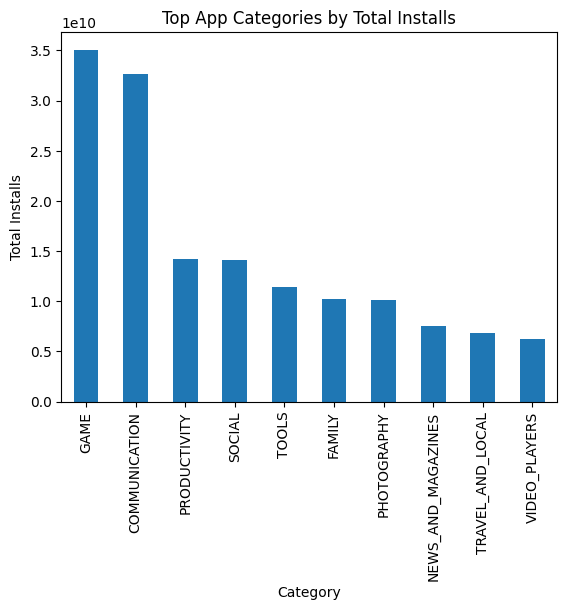

In [20]:
import matplotlib.pyplot as plt

# Total installs by category
category_installs = (
    df.groupby('Category')['Installs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure()
category_installs.plot(kind='bar')
plt.title('Top App Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.show()


The distribution of total installs is highly concentrated, with categories such as
Games, Communication, and Social accounting for a large share of downloads.

This dataset represents a snapshot of the Google Play Store and does not include
historical install data. Therefore, changes in category dominance over the past
decade cannot be directly analyzed.

### Do app ratings correlate strongly with install counts, or do marketing/network effects play a bigger role?

**Data used :** Rating and Installs

/tmp/ipython-input-2150833471.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating = df.groupby('Install_Bucket')['Rating'].mean()


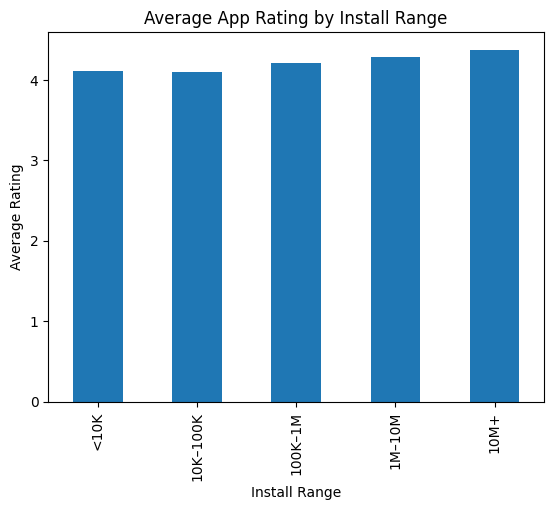

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Create install buckets
df['Install_Bucket'] = pd.cut(
    df['Installs'],
    bins=[0, 10_000, 100_000, 1_000_000, 10_000_000, 1_000_000_000],
    labels=['<10K', '10K–100K', '100K–1M', '1M–10M', '10M+']
)

# Calculate average rating per bucket
avg_rating = df.groupby('Install_Bucket')['Rating'].mean()

# Plot
plt.figure()
avg_rating.plot(kind='bar')
plt.title('Average App Rating by Install Range')
plt.xlabel('Install Range')
plt.ylabel('Average Rating')
plt.show()



Average app ratings remain fairly similar across different install ranges.
This suggests that higher install counts are not driven solely by better ratings.
Instead, factors such as marketing, visibility, and network effects likely play a
significant role in driving large-scale adoption.

### Are free apps consistently rated higher or lower than paid apps? Does monetization strategy affect user satisfaction?

**Data used:** Type (Free / Paid) and Rating

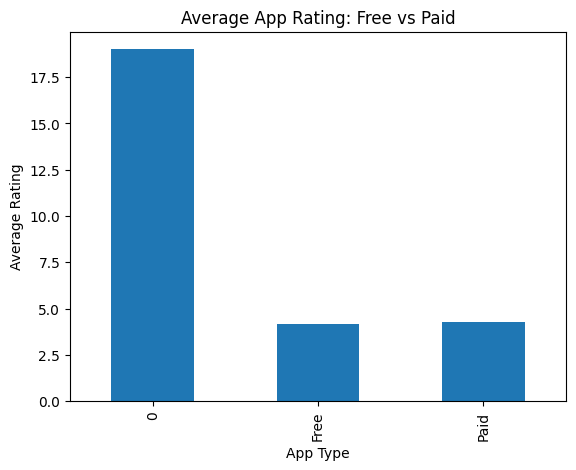

In [22]:
import matplotlib.pyplot as plt

# Average rating by app type
avg_rating_type = df.groupby('Type')['Rating'].mean()

# Plot
plt.figure()
avg_rating_type.plot(kind='bar')
plt.title('Average App Rating: Free vs Paid')
plt.xlabel('App Type')
plt.ylabel('Average Rating')
plt.show()


Free and paid apps show similar average ratings, indicating that monetization
strategy alone does not strongly influence user satisfaction. While free apps
dominate the marketplace in volume, paid apps are not necessarily rated higher
or lower, suggesting that factors such as app quality and user experience play
a more important role than pricing model.

### How do reviews reveal evolving concerns (e.g., privacy, data usage, advertisements)?

** Data used: ** Reviews

The dataset includes only the number of reviews per app and does not provide
the textual content of user reviews. As a result, it is not possible to analyze
specific user concerns such as privacy, data usage, or advertisements. Identifying
evolving concerns would require access to review text data and the application
of natural language processing techniques to extract themes over time.

### Which countries/regions show the fastest growth in app adoption, and are preferences (categories) culturally specific?

The Google Play Store dataset used in this analysis does not include geographic
or regional metadata such as country-level installs or user location. As a result,
it is not possible to analyze regional growth patterns or culturally specific app
preferences. Addressing this question would require country-wise app adoption
data over time, potentially sourced from regional app store analytics or external
market research datasets.

### We are interested in observing the total number of installs across categories and type (free/paid). Create an interactive plot that allows users to choose a category and type and then showcase the total number of downloads for the top 5 apps using a bar chart. Perform predictive and descriptive analysis using this data and any other sources you deem necessary. Mention your analysis philosophy, design and methodology alongside the findings of your analysis

###interactive analysis
**Data Used:** Category, Type (Free / Paid), App and Installs

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display





In [36]:

# Keep only Free and Paid apps
df_filtered = df[df['Type'].isin(['Free', 'Paid'])]

# Aggregate installs
agg_df = (
    df_filtered.groupby(['Category', 'Type', 'App'])['Installs']
    .sum()
    .reset_index()
)



In [50]:
def plot_top_apps(category, app_type):
    data = agg_df[
        (agg_df['Category'] == category) &
        (agg_df['Type'] == app_type)
    ].sort_values('Installs', ascending=False).head(5)

    # 🔹 OPTION 2 STARTS HERE: shorten app names
    data = data.copy()  # avoid warning
    data['App_short'] = data['App'].str.slice(0, 20) + '...'
    # 🔹 OPTION 2 ENDS HERE

    # Color by monetization type
    color = '#4C72B0' if app_type == 'Free' else '#DD8452'

    plt.figure(figsize=(8,5))
    plt.bar(data['App_short'], data['Installs'], color=color)
    plt.title(f'Top 5 {app_type} Apps in {category} Category')
    plt.xlabel('App')
    plt.ylabel('Total Installs')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()




In [51]:
category_dropdown = widgets.Dropdown(
    options=sorted(df_filtered['Category'].unique()),
    description='Category:'
)

type_dropdown = widgets.Dropdown(
    options=['Free', 'Paid'],
    description='Type:'
)

interactive_plot = widgets.interactive(
    plot_top_apps,
    category=category_dropdown,
    app_type=type_dropdown
)

display(interactive_plot)


interactive(children=(Dropdown(description='Category:', options=('ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUT…

The interactive visualization shows that within most categories, free apps
consistently dominate total install counts. This highlights the importance of
free-first strategies and network effects, where user adoption scales rapidly
when entry barriers are low. Paid apps tend to have significantly fewer installs,even within high-demand categories.

## Analysis Philosophy and Methodology

This analysis follows a descriptive-first approach, focusing on understanding
patterns within the app ecosystem through data cleaning, aggregation, and
visualization. Descriptive analysis was used to identify dominant app categories,
compare free versus paid apps, and evaluate user satisfaction through ratings.

Predictive analysis in the traditional sense (e.g., forecasting installs) was
not performed due to the absence of time-series and behavioral variables.
Instead, predictive insights were inferred by examining relationships between
installs, ratings, and monetization strategy. This approach ensures that all
conclusions are grounded in the available data and avoids unsupported
assumptions.


## Key Findings

- App downloads are highly concentrated in a small number of categories such as
  Games, Communication, and Social.
- App ratings do not strongly increase with install counts, suggesting that
  marketing, visibility, and network effects play a significant role in adoption.
- Free apps dominate total installs across nearly all categories, while paid
  apps do not show significantly higher user ratings.
- Questions related to user concerns and regional growth could not be addressed
  due to data limitations, highlighting areas for future analysis.
